# Showing MK's Impact Using PIT

The DC government has questioned whether Miriam's Kitchen (MK) is worth the cost. The government would rather spend 20,000 on private housing as compared to 40,000 for MK initiatives. Using Point in Time data (how many homeless people were on the streets or sheltered at a given point of time) for Federal CoC (Continuum of Care), Federal State, and MK, we can compare how MK does as compared to other homeless efforts in DC. 

We'll be using Federal State, Federal CoC, and MK data. For each, we'll take the PIT for both sheltered homeless and overall homeless from the years 2017-2018. Since there are vastly more homeless in DC State and DC CoC programs than there are in MK, we'll instead compare the ratio of sheltered homeless PIT and overall homeless PIT for each of those 3 categories. 

### Load in Data

In [13]:
federal_folder = 'federal_data'
mk_folder = 'mk_data'
federal_coc_pit_file = '2007-2018-PIT-Counts-by-CoC'
federal_state_pit_file = '2007-2018-PIT-Counts-by-State'
mk_pit_file = 'Cumulative_MK_PIT_Cleaned_Results_2007_to_2018'

import pandas as pd
from pandas import Series,DataFrame

federal_coc_pit_excel_file = pd.ExcelFile('data/' + federal_folder + '/' + federal_coc_pit_file + '.xlsx')
federal_state_pit_excel_file = pd.ExcelFile('data/' + federal_folder + '/' + federal_state_pit_file + '.xlsx')

mk_pit_excel_file = pd.ExcelFile('data/' + mk_folder + '/' + mk_pit_file + '.xlsx')

mk_pit_data = pd.read_excel(mk_pit_excel_file, 'Sheet2')

Federal CoC and Federal State has only one entry for DC State. We hardcoded the row number for each Federal DC CoC and Federal DC State. 

In [14]:
state_key = 7
coc_key = 68

ratio_th_dict = {}

ratio = lambda subset,total: subset/total 

for mk_key in mk_pit_data.keys():
    federal_state_pit_data = pd.read_excel(federal_state_pit_excel_file, str(mk_key))
    federal_coc_pit_data = pd.read_excel(federal_coc_pit_excel_file, str(mk_key))

    ratio_th_dict[mk_key] = {}
   
    ratio_th_dict[mk_key]['Federal State PIT'] = ratio(federal_state_pit_data['Sheltered TH Homeless, ' + str(mk_key)][state_key], federal_state_pit_data['Overall Homeless, ' + str(mk_key)][state_key])
    ratio_th_dict[mk_key]['Federal CoC PIT'] = ratio(federal_coc_pit_data['Sheltered TH Homeless, ' + str(mk_key)][coc_key], federal_coc_pit_data['Overall Homeless, ' + str(mk_key)][coc_key]) 
    ratio_th_dict[mk_key]['MK PIT'] = ratio(int(float(mk_pit_data[mk_key]['Shelter / Transitional Housing']) * int(mk_pit_data[mk_key]['Surveys Completed'])), int(mk_pit_data[mk_key]['Surveys Completed'])) 


In [15]:
ratio_th_pit_df = pd.DataFrame(data = ratio_th_dict).T

ratio_th_pit_df.head(12)

,Federal CoC PIT,Federal State PIT,MK PIT
2007,0.391140,0.325564,0.617284
2008,0.323832,0.364494,0.567568
2009,0.239836,0.416185,0.540000
2010,0.217072,0.384157,0.567901
2011,0.407986,0.397189,0.545894
2012,0.077504,0.359937,0.306604
2013,0.191669,0.341296,0.349112
2014,0.241522,0.206247,0.538922
2015,0.228693,0.228693,0.357143
2016,0.212335,0.212335,0.237113


### Violin Plot

Below, we can see that MK PIT has a higher success ratio of shelterhing homeless people point in time than federal CoC and Federal State. Further proving that MK PIT makes a strong impact.

/Users/hdeva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


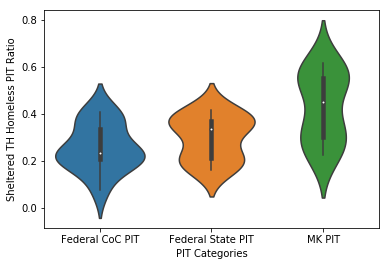

In [16]:
import seaborn as sns

sns.violinplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'))

With 12 data points, we can simply display a swarm plot below.

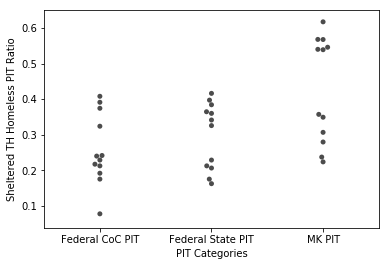

In [17]:

sns.swarmplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'), color='k', alpha=0.7)

Displaying violin and swarm plots together.

/Users/hdeva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


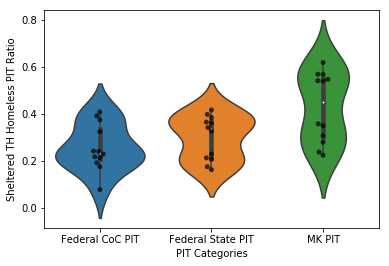

In [18]:
sns.violinplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'))

sns.swarmplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'), color='k', alpha=0.7)

### Chi Squared Test

Now, we want to do a chi squared test to see if MK PIT depends on Federal CoC PIT or Federal State PIT. Given that MK is a Subsection of DC, it would make sense if the MK sample matches either of the Federal DC populations. We will conduct two tests: one with Federal State PIT and MK PIT, another wiht FEderal CoC PIT and MK PIT.

In [19]:
# Chi-squared test with similar proportions 
from scipy import stats

#### Federal State vs MK

In [20]:
# Contingency table
stat,p,dof,expected = stats.chi2_contingency([ratio_th_pit_df['MK PIT'].tolist(), ratio_th_pit_df['Federal State PIT'].tolist()])

# Interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret P-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=19.675, stat=0.152
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


MK PIT is independent of Federal State PIT

#### Federal CoC vs MK

In [21]:
# Contingency table
stat,p,dof,expected = stats.chi2_contingency([ratio_th_pit_df['MK PIT'].tolist(), ratio_th_pit_df['Federal CoC PIT'].tolist()])

# Interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret P-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=19.675, stat=0.304
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


MK PIT is independent of Federal CoC PIT